In [1]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

# For power quantification diagnostic
from gbspy.surfaces import get_line

# Get the current working directory|
cwd = os.getcwd()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.6 </b></span><br>
</div>

In [3]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_d0p6 = s.Psi
ixxpt_PT_d0p6 = s.ixxpt
iyxpt_PT_d0p6 = s.iyxpt
iy0_PT_d0p6 = s.iy0
ix0_PT_d0p6 = s.ix0

ix_OMP_PT_d0p6 = s.ix0 + 50
iy_OMP_PT_d0p6 = s.iy0


t_final = s.time[-1]
t_init = t_final
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6 = s.get_field('n', t1=t_init, t2=t_final); dens_DPT_d0p6_avg  = np.mean(dens_DPT_d0p6, axis=(2,3));

Te_DPT_d0p6 = s.get_field('Te', t1=t_init, t2=t_final)

vpare_DPT_d0p6 = s.get_field('vpare', t1=t_init, t2=t_final)

# Fluctuating quantity


# Convective Heat Flux
qpare_DPT_d0p6 = (5/2) * np.mean(vpare_DPT_d0p6 * Te_DPT_d0p6 * dens_DPT_d0p6, axis=(2,3))

# For DPT 0.6
UI_DPT_d0p6=(158.85261121620908, 709.7637771419237)
UO_DPT_d0p6=(305.110743051502, 721.353638088224)
LI_DPT_d0p6=(158.85475695604873, 90.23778669576583)
LO_DPT_d0p6=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_d0p6, length_UI_DPT_d0p6 = get_line(s, UI_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_d0p6, length_UO_DPT_d0p6 = get_line(s, UO_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_d0p6, length_LI_DPT_d0p6 = get_line(s, LI_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_d0p6, length_LO_DPT_d0p6 = get_line(s, LO_DPT_d0p6, (-40,40), "psi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_d0p6)
qpare_DPT_d0p6_UI = qpare_interpolant(coord_UI_DPT_d0p6[1,:], coord_UI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_UO = qpare_interpolant(coord_UO_DPT_d0p6[1,:], coord_UO_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LI = qpare_interpolant(coord_LI_DPT_d0p6[1,:], coord_LI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LO = qpare_interpolant(coord_LO_DPT_d0p6[1,:], coord_LO_DPT_d0p6[0,:], grid=False)

# Integrate heat flux
Heat_DPT_d0p6_LO = np.abs(np.sum(qpare_DPT_d0p6_LO)); Heat_DPT_d0p6_UO = np.abs(np.sum(qpare_DPT_d0p6_UO))
Heat_DPT_d0p6_LI = np.abs(np.sum(qpare_DPT_d0p6_LI)); Heat_DPT_d0p6_UI = np.abs(np.sum(qpare_DPT_d0p6_UI))

# Peak Heat Flux
Peak_DPT_d0p6_LO = np.max(np.abs(qpare_DPT_d0p6_LO)); Peak_DPT_d0p6_UO = np.max(np.abs(qpare_DPT_d0p6_UO))
Peak_DPT_d0p6_LI = np.max(np.abs(qpare_DPT_d0p6_LI)); Peak_DPT_d0p6_UI = np.max(np.abs(qpare_DPT_d0p6_UI))

qpeak_asym_outer_DPT_d0p6 = np.abs(Peak_DPT_d0p6_LO) - np.abs(Peak_DPT_d0p6_UO)
qtot_asym_outer_DPT_d0p6 = np.abs(Heat_DPT_d0p6_LO - Heat_DPT_d0p6_UO)

Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/3_GBS_DN_Tria


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 </b></span><br>
</div>

In [4]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_dn0p6 = s.Psi
ixxpt_NT_dn0p6 = s.ixxpt
iyxpt_NT_dn0p6 = s.iyxpt
iy0_NT_dn0p6 = s.iy0
ix0_NT_dn0p6 = s.ix0

ix_OMP_NT_dn0p6 = s.ix0 + 76
iy_OMP_NT_dn0p6 = s.iy0

dens_DNT_dn0p6  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_dn0p6 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_dn0p6 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_dn0p6 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_dn0p6_avg = np.mean(vpare_DNT_dn0p6, axis=(2,3))

# Convective Heat Flux
qpare_DNT_dn0p6 = (5/2) * np.mean(vpare_DNT_dn0p6 * Te_DNT_dn0p6 * dens_DNT_dn0p6, axis=(2,3))

# For balanced DN
UO_DNT_dn0p6=(456.5503784658009, 709.075944151039)
UI_DNT_dn0p6=(310.36118514691896, 721.6963043686486)
LI_DNT_dn0p6=(310.3629879445284, 78.30729369710014)
LO_DNT_dn0p6=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_dn0p6, length_UI_DNT_dn0p6 = get_line(s, UI_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_dn0p6, length_UO_DNT_dn0p6 = get_line(s, UO_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_dn0p6, length_LI_DNT_dn0p6 = get_line(s, LI_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_dn0p6, length_LO_DNT_dn0p6 = get_line(s, LO_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_dn0p6)
qpare_DNT_dn0p6_UI = qpare_interpolant(coord_UI_DNT_dn0p6[1,:], coord_UI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_UO = qpare_interpolant(coord_UO_DNT_dn0p6[1,:], coord_UO_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LI = qpare_interpolant(coord_LI_DNT_dn0p6[1,:], coord_LI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LO = qpare_interpolant(coord_LO_DNT_dn0p6[1,:], coord_LO_DNT_dn0p6[0,:], grid=False)

# Integrate heat flux
Heat_DNT_dn0p6_LO = np.abs(np.sum(qpare_DNT_dn0p6_LO)); Heat_DNT_dn0p6_UO = np.abs(np.sum(qpare_DNT_dn0p6_UO))
Heat_DNT_dn0p6_LI = np.abs(np.sum(qpare_DNT_dn0p6_LI)); Heat_DNT_dn0p6_UI = np.abs(np.sum(qpare_DNT_dn0p6_UI))

# Peak Heat Flux
Peak_DNT_dn0p6_LO = np.max(np.abs(qpare_DNT_dn0p6_LO)); Peak_DNT_dn0p6_UO = np.max(np.abs(qpare_DNT_dn0p6_UO))
Peak_DNT_dn0p6_LI = np.max(np.abs(qpare_DNT_dn0p6_LI)); Peak_DNT_dn0p6_UI = np.max(np.abs(qpare_DNT_dn0p6_UI))

qpeak_asym_outer_DNT_dn0p6 = np.abs(Peak_DNT_dn0p6_LO) - np.abs(Peak_DNT_dn0p6_UO)
qtot_asym_outer_DNT_dn0p6 = np.abs(Heat_DNT_dn0p6_LO - Heat_DNT_dn0p6_UO)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Now figures for the paper </b></span><br>
</div>

In [5]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Each target power distribution comparison </b></span><br>
</div>

NameError: name 'Heat_DNT_dn0p3_LO' is not defined

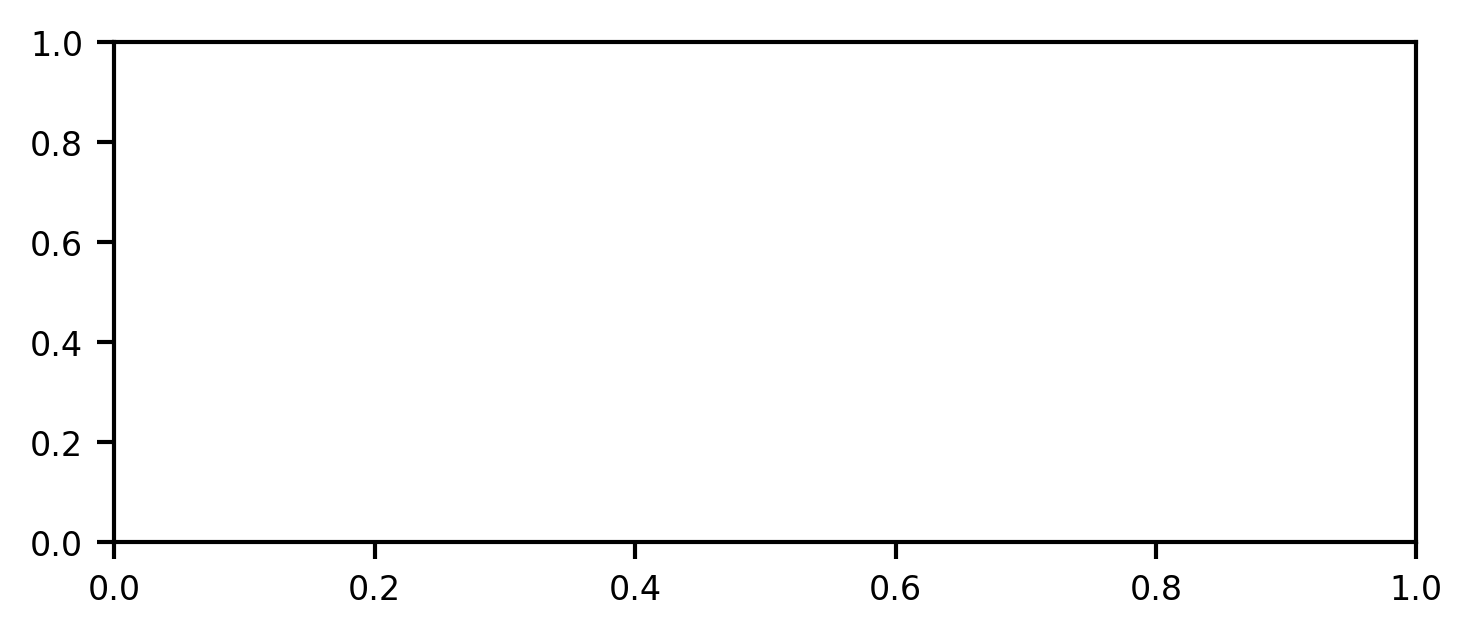

In [6]:
# Colors for each category
colors = ['tab:blue', 'tab:cyan', 'firebrick', 'lightcoral']

# Creating the figure and axes


fig, ax = plt.subplots(ncols=1, figsize=(1.6*fig_width, fig_height))


# Bar positions and width
bar_width = 0.4
index = np.arange(6)  # Positions for DNT and DPT

# Function to plot stacked bars
def plot_stacked_bars(index, heat_values, colors, labels):
    bottom = 0
    for value, color in zip(heat_values, colors):
        plt.bar(index, value, bottom=bottom, color=color, width=bar_width, edgecolor='white', label=labels[heat_values.index(value)])
        bottom += value

# Grouping the heat values for DNT and DPT
heat_DNT_dn0p3_outer = [Heat_DNT_dn0p3_LO, Heat_DNT_dn0p3_UO]
heat_DNT_dn0p3_inner = [Heat_DNT_dn0p3_LI, Heat_DNT_dn0p3_UI]
heat_DNT_dn0p4_outer = [Heat_DNT_dn0p4_LO, Heat_DNT_dn0p4_UO]
heat_DNT_dn0p4_inner = [Heat_DNT_dn0p4_LI, Heat_DNT_dn0p4_UI]
heat_DNT_dn0p5_outer = [Heat_DNT_dn0p5_LO, Heat_DNT_dn0p5_UO]
heat_DNT_dn0p5_inner = [Heat_DNT_dn0p5_LI, Heat_DNT_dn0p5_UI]
heat_DNT_dn0p6_outer = [Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO]
heat_DNT_dn0p6_inner = [Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI]


heat_DPT_d0p3_outer = [Heat_DPT_d0p3_LO, Heat_DPT_d0p3_UO]
heat_DPT_d0p3_inner = [Heat_DPT_d0p3_LI, Heat_DPT_d0p3_UI]
heat_DPT_d0p4_outer = [Heat_DPT_d0p4_LO, Heat_DPT_d0p4_UO]
heat_DPT_d0p4_inner = [Heat_DPT_d0p4_LI, Heat_DPT_d0p4_UI]
heat_DPT_d0p5_outer = [Heat_DPT_d0p5_LO, Heat_DPT_d0p5_UO]
heat_DPT_d0p5_inner = [Heat_DPT_d0p5_LI, Heat_DPT_d0p5_UI]
heat_DPT_d0p6_outer = [Heat_DPT_d0p6_LO, Heat_DPT_d0p6_UO]
heat_DPT_d0p6_inner = [Heat_DPT_d0p6_LI, Heat_DPT_d0p6_UI]

# Labels for the legend
labels = ['LO', 'UO', 'LI', 'UI']

# Plotting stacked bars for DNT and DPT

plot_stacked_bars(index[0] - bar_width/2, heat_DNT_dn0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[0] + bar_width/2, heat_DNT_dn0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[1] - bar_width/2, heat_DPT_d0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[1] + bar_width/2, heat_DPT_d0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[2] - bar_width/2, heat_DNT_dn0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[2] + bar_width/2, heat_DNT_dn0p4_outer, colors[:2], labels[:2])

plot_stacked_bars(index[3] - bar_width/2, heat_DPT_d0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[3] + bar_width/2, heat_DPT_d0p4_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p5_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p5_outer, colors[:2], labels[:2])


plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p6_outer, colors[:2], labels[:2])

plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p6_outer, colors[:2], labels[:2])

# Adding titles and labels
#plt.title('Total Heat Distribution in DNT and DPT Regions')
plt.ylabel(r'Total $q_{\parallel, e}$ (a. u.) ')

#plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
#                   'NT\n$\delta=-0.5$', 'PT\n$\delta=+0.5$', 'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])
plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
                'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])

# Adding a legend to explain the colors
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), title='Heat Categories', bbox_to_anchor=(0.5, 1), loc='upper left')
# Adjusting the legend to display horizontally
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.2, 1), 
           loc='upper left', ncol=len(by_label.keys()), borderaxespad=0., framealpha=0)


# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("qpar_bar_graph.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)